## Convolutional Neural Network Model

[Convolutional Neural Networks](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNNs) exhibit exceptional performance, particularly for image recognition. The inpiration for CNNs comes from the visual cortex of animal brains. CNNs are space and shift invariant, which is an important property for image recognition.

This example requires Python 3, Keras, Tensorflow, matplotlib, and numpy. You can use either Tensorflow-CPU or Tensorflow-GPU. Training a CNN mode will take longer than a simpler, fully connected model, so GPU training is preferred.

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random

Using TensorFlow backend.


These are some configuration parameters and hyperparameters.

In [2]:
# Input image dimensions
img_rows, img_cols = 28, 28

# The number of training samples per batch. 128 is a reasonable number.
batch_size = 128

# Our data set contains 10 digits, so the number of classes is 10
num_classes = 10

# epochs is the number of times the model is trained with the data set, more can be better, up to a point
epochs = 5

# dropout is a common regularization hyperperameter. It helps to avoid overfitting or memorizing the input.
dropout = 0.5

### Load data

Keras has a builting function for loading MNIST data and splitting it into train and test sets. x_train and x_test are arrays of train and test input images respectively. Images are represented as a 28 x 28 matrix of pixel values. y_train and y_test are train and test labels respectively.

Pixel values are normalized into values ranging from 0.0 - 1.0.

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Save original test images for display purposes
orig_test = x_test

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


The following cell display random test images to get an idea of what they look like.

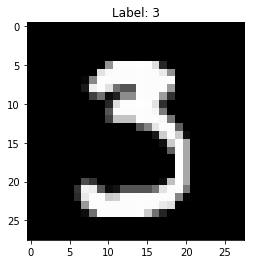

In [4]:
index = random.randrange(1000)
plt.imshow(orig_test[index], cmap='gray')
plt.title('Label: %d' % y_test[index])
plt.show()

### Define Model

CNNs are like two dimensional [Finite Impulse Response](https://en.wikipedia.org/wiki/Finite_impulse_response) (FIR) filters commonly used in signal processing. Models with over 100 CNN, pooling, padding, and other layers have been successfully trained to recognize complex objects as well as multiple objects in the one image.

This model uses two convolutional layers, a max pooling layer, a dense layer, and a one-hot encoded output layer. Even with these few layers, this modela can achieve over 99% accuracy.

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout/2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)      

### Train Model

This is more or less boilerplate Keras code to train the model given the training data set. Keras can also evaluate the trained model given the test data set. Matplotlib is used to plot train and test accuracy as a function of the epoch number.

Ideally, the accuracy with test and train data should be about the same. Low training accuracy means the model exhibits high bias. High bias could be caused by a weak model, not enough training examples, or too few training epochs. High train accuracy and low test accuracy is a case of high variance. This means the model is more or less "memorizing" the expected output and not generalizing well. High variance can be reduced through *regularization*.

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 69s 1ms/step - loss: 0.2303 - acc: 0.9301 - val_loss: 0.0506 - val_acc: 0.9834
Epoch 2/5
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0826 - acc: 0.9756 - val_loss: 0.0374 - val_acc: 0.9875
Epoch 3/5
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0608 - acc: 0.9818 - val_loss: 0.0369 - val_acc: 0.9878
Epoch 4/5
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0507 - acc: 0.9843 - val_loss: 0.0317 - val_acc: 0.9891
Epoch 5/5
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0422 - acc: 0.9866 - val_loss: 0.0306 - val_acc: 0.9896
Test loss: 0.030577964167285244
Test accuracy: 0.9896


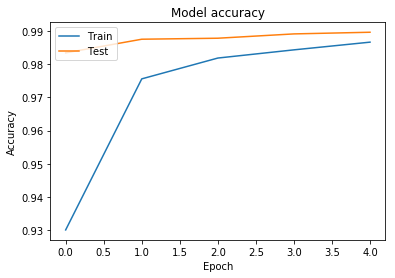

In [6]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train model for a given number of epochs
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# Evaluate model against test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Save model structure and trained weights/biases to separate files.

These files will be used to restore the trained model at prediction time.

In [7]:
model_structure = model.to_json()
with open("model_cnn.json", "w") as json_file:
    json_file.write(model_structure)
model.save_weights("weights_cnn.h5")